## Kaggle Workloads Run-time Experiment
In this notebook, we make the plot in Figure 4 (d) of Section 6.2

Experiment result is located here:

'./experiment_results/remote/execution_time/different_workloads/kaggle_home_credit/cloud-41/2019-10-18/00-22.csv'


In [1]:
# numpy and pandas for data manipulation
import sys
# Suppress warnings
import warnings
import seaborn as sns
import matplotlib as plt
import networkx as nx
import numpy as np
import matplotlib.ticker as ticker
import pandas as pd
import os
import matplotlib2tikz
plt.style.use('seaborn')
sns.set(style="whitegrid")
sns.set_style({'grid.color': '.5'})
plt.rc('hatch', color='white', linewidth=5)

FONT_SIZE = 32
plt.rcParams.update({
    "lines.markersize": 20,
    "pgf.texsystem": "pdflatex",
    "text.usetex": True,   
    "font.family": "serif",
    "font.serif": [],
    "font.sans-serif": [],
    "font.monospace": [],
    "axes.labelsize": FONT_SIZE,     
    "font.size": FONT_SIZE,
    "legend.fontsize": FONT_SIZE, 
    "xtick.labelsize": FONT_SIZE,
    "ytick.labelsize": FONT_SIZE,
    #"figure.figsize": figsize(1.0), 
     "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        ]
})

warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
ROOT_RESULT_FOLDER = '/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/experiment_results/remote/'


SYSTEM_COLOR = sns.color_palette()[0]
BASELINE_COLOR = sns.color_palette()[1]

WRITE_DIRECTORY_ROOT = \
'/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/papers/images/experiment-results/'

output_directory = WRITE_DIRECTORY_ROOT + 'kaggle_home_credit/execution_time'
def create_folder(path):
    if not os.path.exists(os.path.dirname(path)):
        try:
            os.makedirs(os.path.dirname(path))
        except OSError as exc:  # Guard against race condition
            if exc.errno != errno.EEXIST:
                raise
def savefig(filename):
    plt.savefig('{}.pgf'.format(filename), bbox_inches='tight')
    plt.savefig('{}.pdf'.format(filename), bbox_inches='tight')

In [2]:
result_folder = ROOT_RESULT_FOLDER + '/execution_time/different_workloads/kaggle_home_credit/cloud-41'
IN_PAPER_RESULT_FILE = result_folder + '/2019-10-18/00-22.csv'
RESULT_FILE = result_folder + '/2020-02-04/13-00.csv'
#RESULT_FILE=IN_PAPER_RESULT_FILE

In [3]:
HEADERS = [
    'timestamp', 'exp_id', 'repo', 'workload', 'type', 'mat_rate', 'run_time'
]
execution_order = {
    'start_here_a_gentle_introduction': 1,
    'introduction_to_manual_feature_engineering': 2,
    'introduction_to_manual_feature_engineering_p2': 3,
    'fork_cridata_start_here_a_gentle_introduction': 4,
    'fork_taozhongxiao_start_here_a_gentle_introduction': 5,
    'fork_introduction_to_manual_feature_engineering': 6,
    'fork_introduction_to_manual_feature_engineering_p2': 7,
    'fork_join_start_here_intro': 8
}
method_map = {'optimized': 'CO', 'baseline': 'KG', 'helix':'HL'}

execution_times = pd.read_csv(RESULT_FILE, header=None, names=HEADERS)
execution_times['workload_order'] = execution_times['workload'].replace(
    execution_order)
#execution_times = execution_times[execution_times['workload_order'] > 0]
execution_times['cumulative_run_time'] = execution_times.groupby(
    ['exp_id', 'type'])['run_time'].apply(lambda x: x.cumsum())
execution_times['type'] = execution_times['type'].replace(method_map)
#execution_times['workload_order'] = execution_times['workload'].replace(execution_order)

In [4]:
def plot_executions_times(df, loc=None):
    plt.figure(figsize=(12,4))
    plot = sns.lineplot(
        data=df,
        x='workload_order',
        y='cumulative_run_time',
        hue='type',
        style='type',
        estimator='mean',
        err_kws={'elinewidth':5},

        markers={
            'CO': "o",
            'KG': "^",
            'HL': "X"
        },
        hue_order=['CO', 'KG', 'HL'],
        dashes={
            'CO': (1, 0),
            'KG': (5, 1),
            'HL': (3, 3)
        },
        lw=5,
        palette={
            'CO': SYSTEM_COLOR,
            'KG': BASELINE_COLOR,
            'HL': sns.color_palette()[2]
        },
        ci='sd',
        err_style='bars',
        legend='brief')
    lg = plt.legend(
        loc='upper center',
        handlelength=1.5,
        handletextpad=0.1,
        #fontsize=17,
        ncol=3,
        columnspacing=0.5,
        bbox_to_anchor=(0.55, 1.2))
    handles = lg.legendHandles
    labels = ['CO', 'KG','HL']
    del handles[0]
    from matplotlib.lines import Line2D
    handles[0] = Line2D([0], [1],
                        color=SYSTEM_COLOR,
                        lw=5,
                        dashes=(1, 0),
                        marker="o")
    
    handles[1] = Line2D([0], [1],
                        color=BASELINE_COLOR,
                        lw=5,
                        dashes=(5, 1),
                        marker="^")
    
    handles[2] = Line2D([0], [1],
                        color=sns.color_palette()[2],
                        lw=5,
                        dashes=(3, 3),
                        marker="X")
    
    legend = plt.legend(
        handles,
        labels,
        frameon=True,
        loc='upper center',
        handlelength=2,
        handletextpad=0.1,
        #fontsize=TICK_LABEL_SIZE,
        numpoints=1,
        ncol=1,
        columnspacing=0.5,
        bbox_to_anchor=(.15, 1.1))
    legend.get_frame().set_edgecolor('black')
    legend.get_frame().set_linewidth(2.0)
    
#     for line in legend.get_lines():
#         line.set_linewidth(4.0)
    plot.set_xlabel('Workload')
    plot.set_ylabel('Cumulative \nRun Time (s)')
    plot.set_yticks([0, 500, 1000, 1500, 2000])
    #plt.tick_params(labelsize=TICK_LABEL_SIZE)
    plot.set_xticks(range(1,9))
    plot.set_xticklabels(range(1,9))
    plot.yaxis.set_major_formatter(ticker.EngFormatter(sep=''))
    return plot

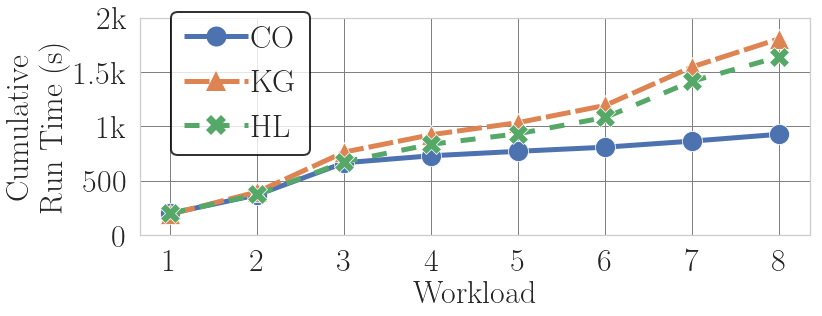

In [5]:
#plot_executions_times(execution_times, output_directory+'/different_workloads.pgf')
plot = plot_executions_times(execution_times)
#savefig(output_directory+'/different_workloads')

In [6]:
execution_times.groupby(['workload_order','type']).mean()

mat_rate    run_time  cumulative_run_time
workload_order type                                             
1              CO    16777216.0  199.957809           199.957809
               HL    16777216.0  201.822219           201.822219
               KG           0.0  192.864431           192.864431
2              CO    16777216.0  171.099326           371.057135
               HL    16777216.0  172.197205           374.019424
               KG           0.0  205.082655           397.947086
3              CO    16777216.0  294.536138           665.593273
               HL    16777216.0  300.973976           674.993400
               KG           0.0  366.236751           764.183837
4              CO    16777216.0   64.334071           729.927344
               HL    16777216.0  160.892511           835.885911
               KG           0.0  159.483105           923.666943
5              CO    16777216.0   41.146594           771.073937
               HL    16777216.0   96.879281           932.765192
               KG           0.0  111.426493          1035.093436
6              CO    16777216.0   37.724867           808.798804
               HL    16777216.0  150.120851          1082.886043
               KG           0.0  158.231853          1193.325289
7              CO    16777216.0   56.008124           864.806928
               HL    16777216.0  332.964982          1415.851025
               KG           0.0  354.507144          1547.832433
8              CO    16777216.0   62.700607           927.507535
               HL    16777216.0  224.002265          1639.853290
               KG           0.0  258.276906          1806.109339

In [35]:
KG = 1806.109339
CO = 927.507535
print 'improvement: {}'.format((KG - CO)/KG)

improvement: 0.486461027042
